In [1]:
#! /usr/bin/env python3

#Imports
import sys
import os
import numpy as np
from ast import literal_eval
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from collections import Counter

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
#import tables
import time
from scipy import stats
import glob
import pdb

Epoch: 0
Top 10 performance: 14.0 %


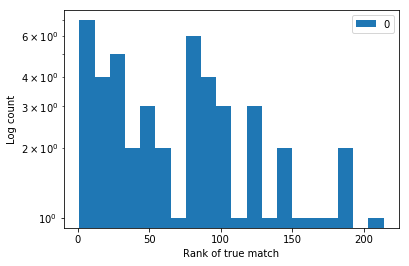

Epoch: 5
Top 10 performance: 36.0 %


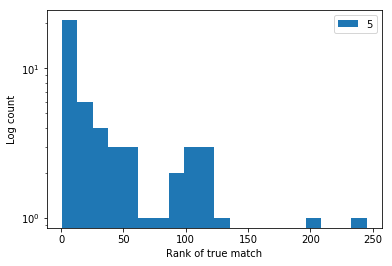

Epoch: 10
Top 10 performance: 38.0 %


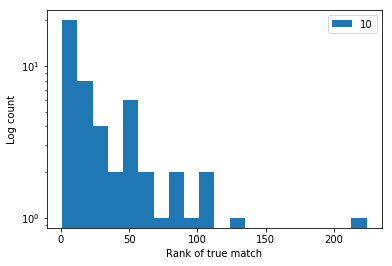

Epoch: 15
Top 10 performance: 34.0 %


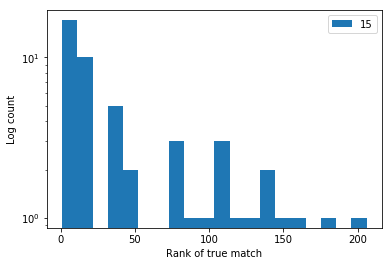

Epoch: 20
Top 10 performance: 48.0 %


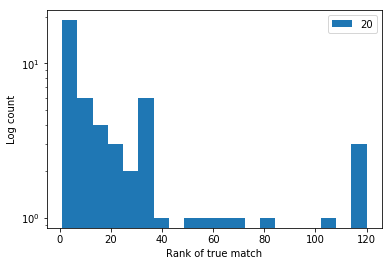

Epoch: 25
Top 10 performance: 42.0 %


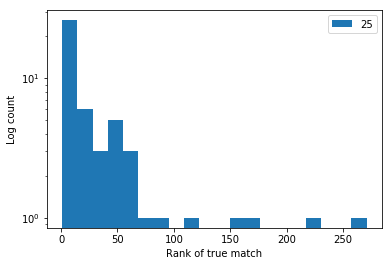

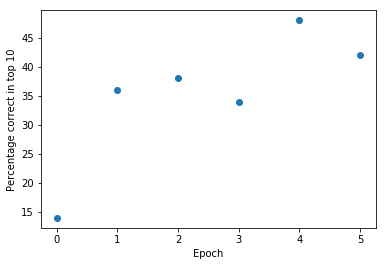

In [43]:
#Plot H-group predictions
base = '/home/pbryant/results/CATH/model_out/20190806/'
test_results = glob.glob(base+'*.csv')
top10_percentages = []
for i in range(0,len(test_results),5):
    print('Epoch:',i)
    test_df = pd.read_csv(base+'test_pred_'+str(i)+'.csv')
    true_rank = test_df['rank_of_true']
    true_rank = np.asarray(true_rank)
    top10 = np.where(true_rank <= 10)
    percentage = len(top10[0])*100/len(true_rank)
    top10_percentages.append(percentage)
    print('Top 10 performance:', percentage, '%')
    #ax = sns.scatterplot(x = 'group_enc', y= 'rank_of_true', data = test_df)
    #ax.set(yscale="log")
    plt.hist(test_df['rank_of_true'], bins = 20, log = True, label = str(i))
    plt.xlabel('Rank of true match')
    plt.ylabel('Log count')
    plt.legend(loc='upper right')
    plt.show()
   
plt.show()
plt.scatter(range(len(top10_percentages)),top10_percentages)
plt.xlabel('Epoch')
plt.ylabel('Percentage correct in top 10')
plt.show()
    #sns.scatterplot(x = 'group_enc', y= 'pred_group_enc', data = test_df)
    #plt.show()

In [50]:
above5df = pd.read_csv('/home/pbryant/evolution/CATH/alignment_free/above5df.csv')

#Load labels
y_labels = np.load('/home/pbryant/results/CATH/model_out/20190806/y_valid.npy', allow_pickle=True)
y_labels_c = []

CAs = []
groups = [*above5df['H_group']]
for group in groups:
    CA = group.split('.')[0:2]
    CAs.append(CA[0]+'.'+CA[1])

u_CAs = [*Counter(CAs).keys()] 
CA_enc = {}
for i in range(len(u_CAs)):
    CA_enc[u_CAs[i]] = i

y_labels_c = []


for i in y_labels:
    matches = above5df.loc[above5df['group_enc']==i, ['H_group']]
    group = matches.iloc[0][0]
    s = group.split('.')[0:2]
    CA = s[0]+'.'+s[1]
    y_labels_c.append(CA_enc[CA])
#    y_labels_c.append(int(cl)-1)
y_labels_c = np.asarray(y_labels_c)

In [48]:
a = [285, 1]
k =  np.isin(y_labels, a)

y_labels[k]
#np.where(k)
pairs=[np.zeros((max(y_labels),)) for i in range(2)]
pairs[0] = np.repeat(a[0], max(y_labels))
pairs[1][0] = a[0]
pairs

[array([285, 285, 285, ..., 285, 285, 285]),
 array([285.,   0.,   0., ...,   0.,   0.,   0.])]

0


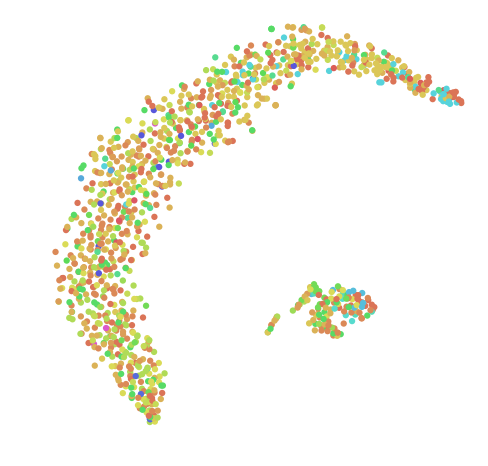

1


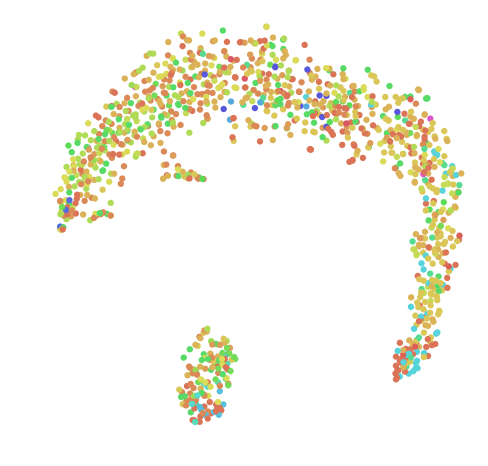

2


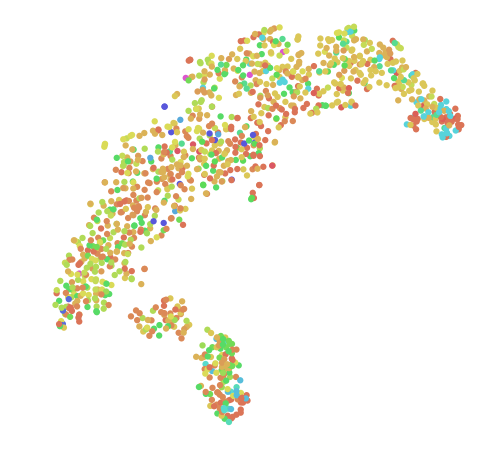

3


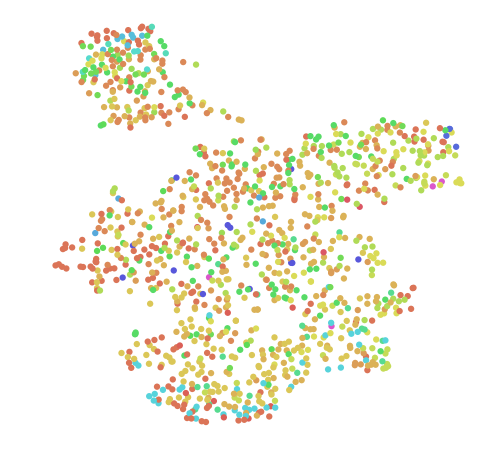

4


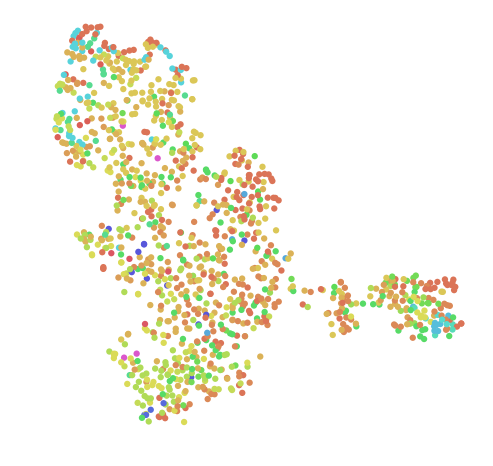

5


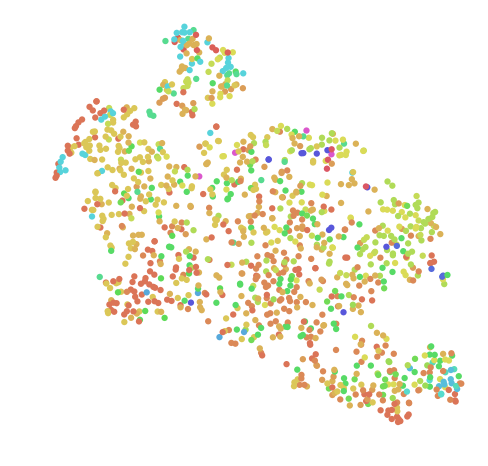

6


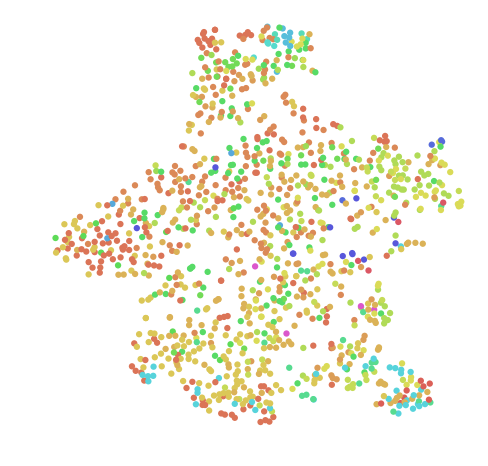

7


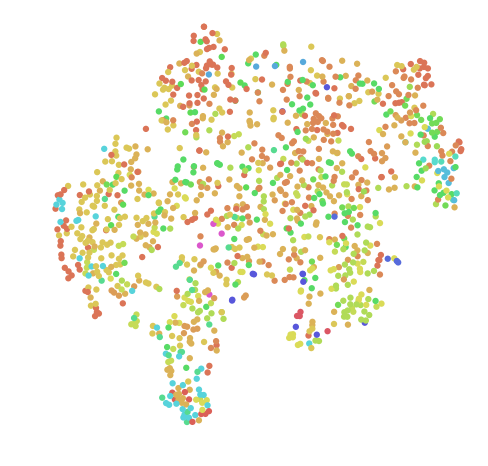

8


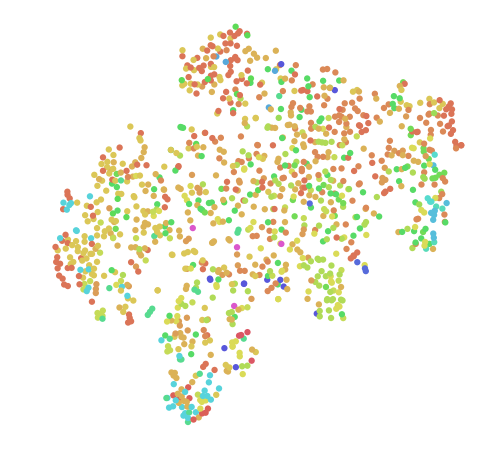

9


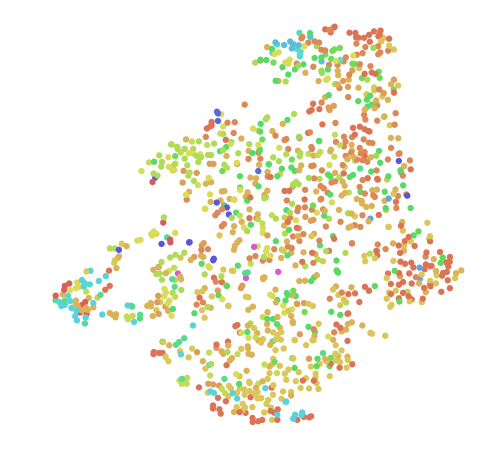

10


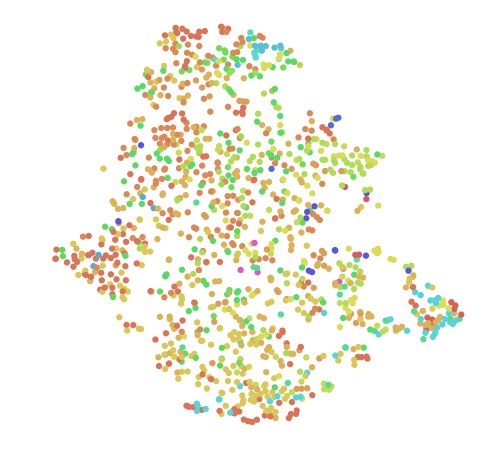

11


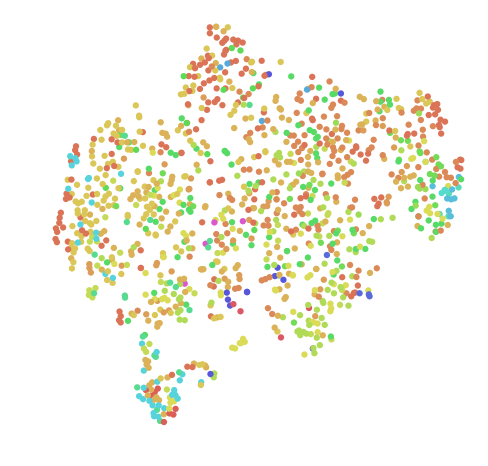

12


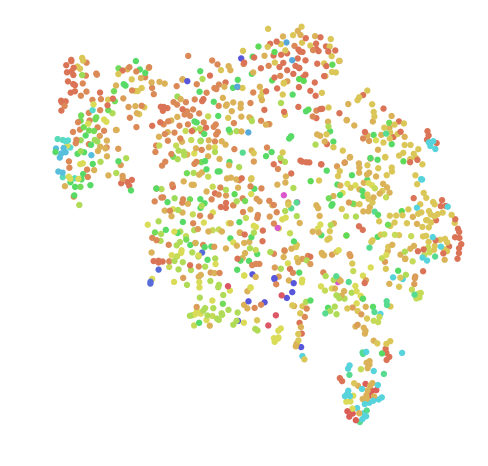

13


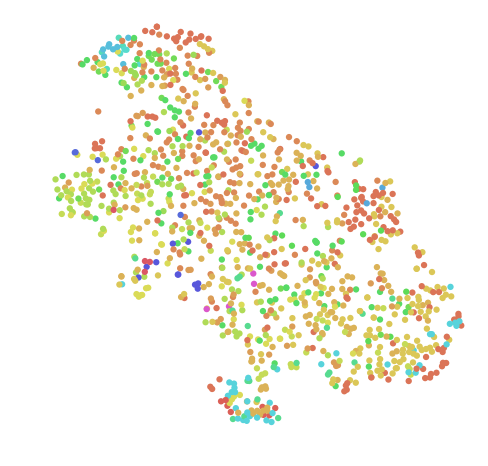

14


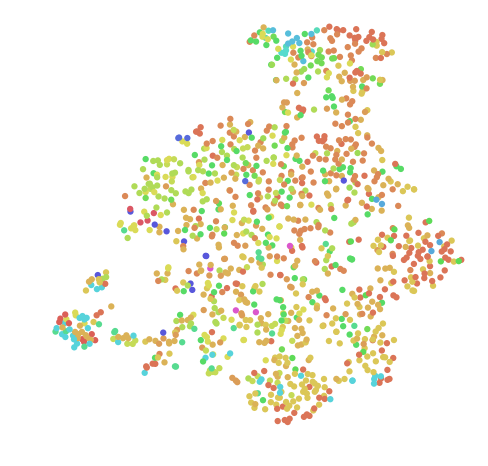

15


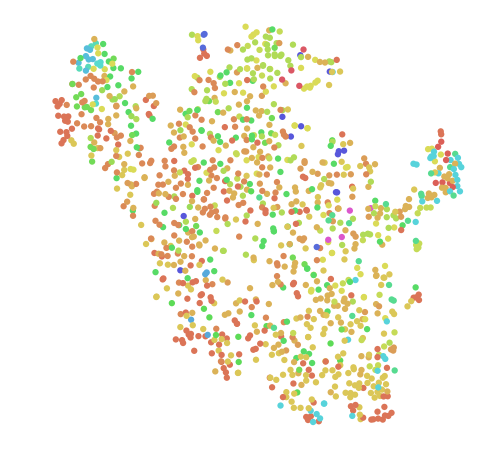

16


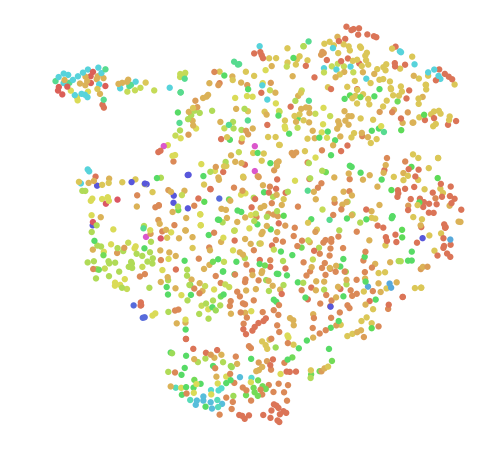

17


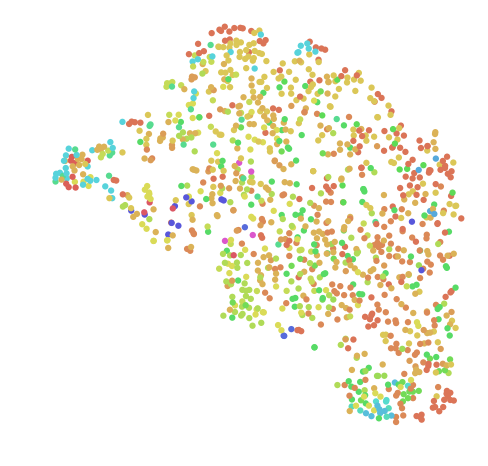

18


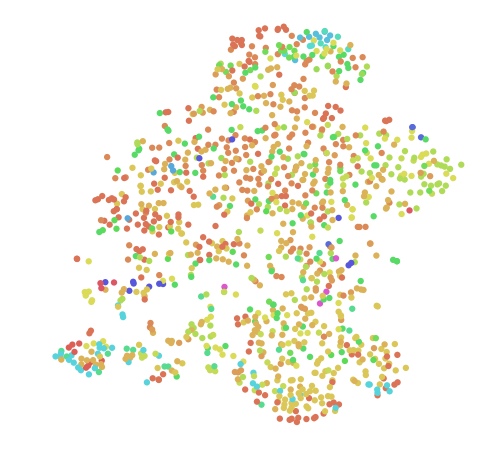

19


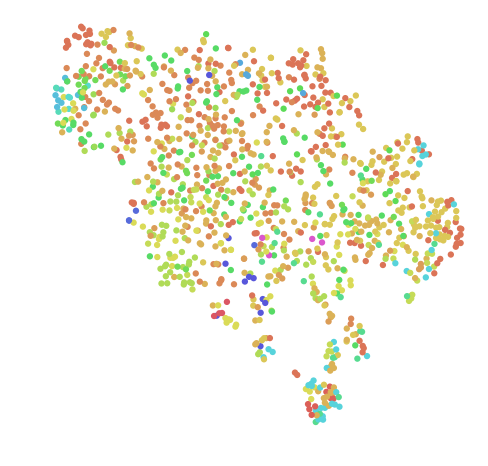

20


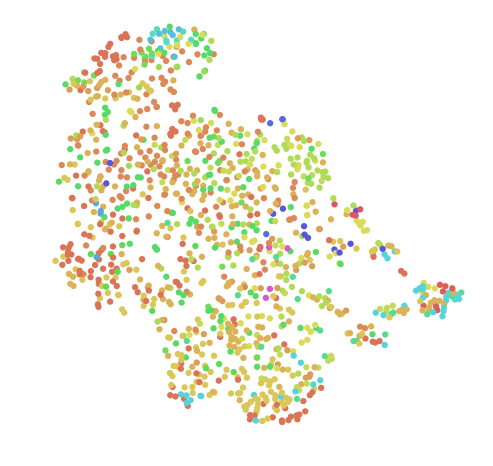

21


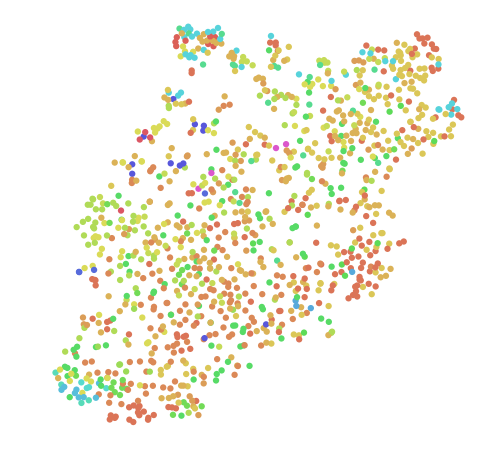

22


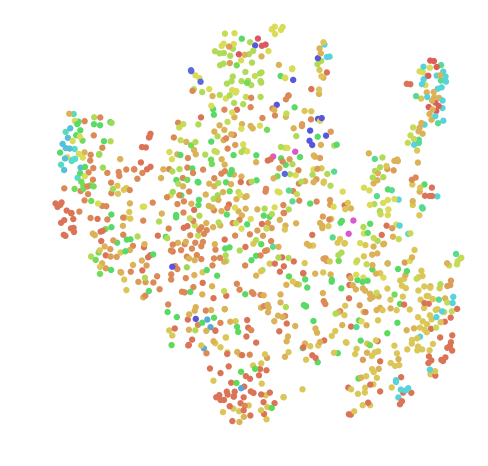

23


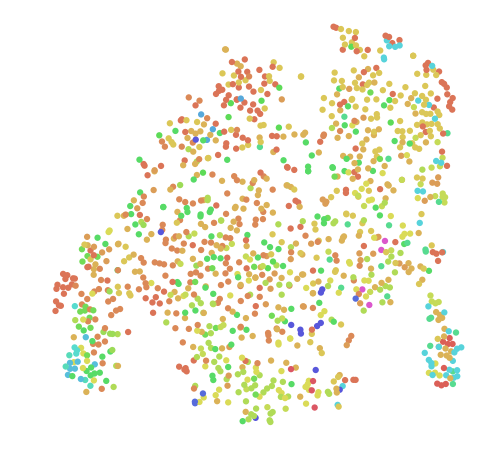

24


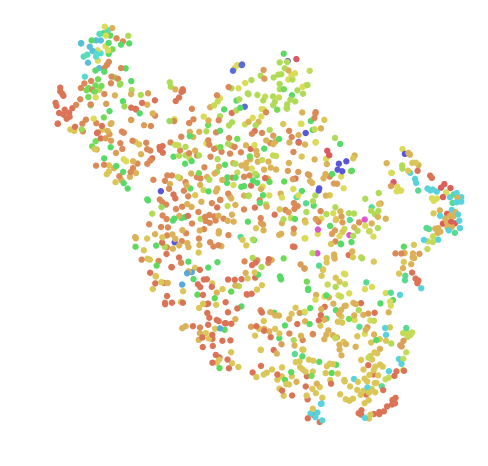

25


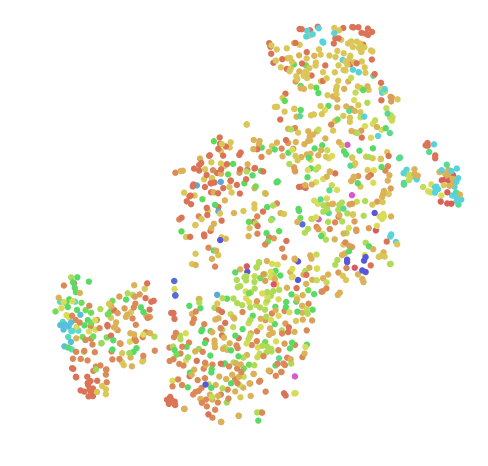

26


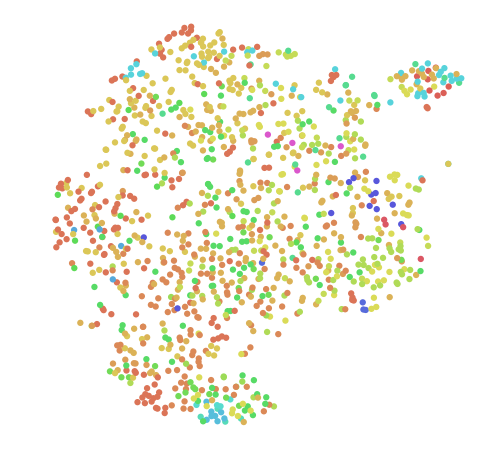

27


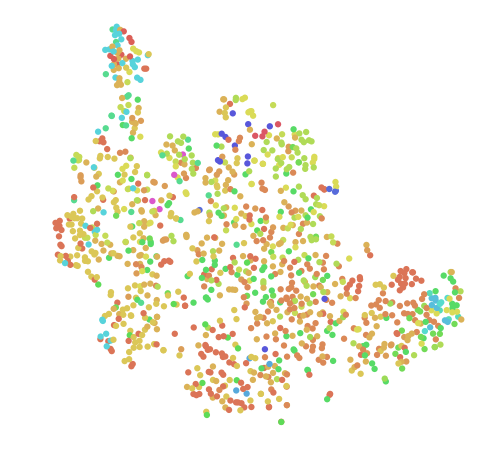

28


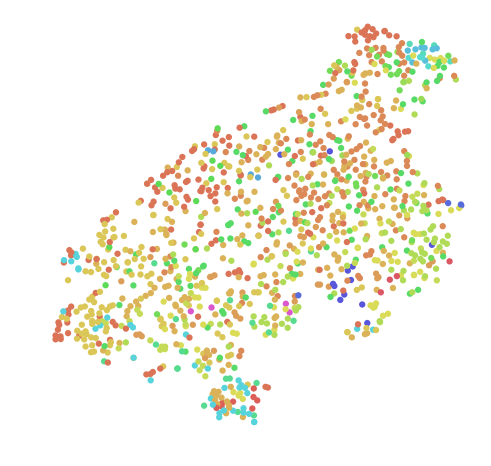

29


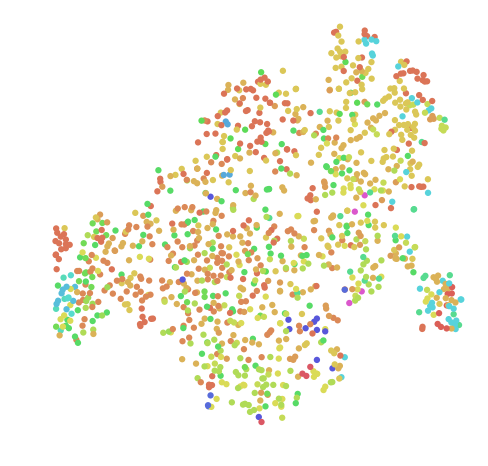

In [60]:
#Visualize embeddings with t-sne
base = '/home/pbryant/results/CATH/model_out/20190806/'

for i in range(0, 30):
    print(i)
    embeddings = np.load(base+'emb_'+str(i)+'.npy', allow_pickle=True)
    fashion_tsne = TSNE(random_state=0).fit_transform(embeddings)
    fashion_scatter(fashion_tsne, y_labels_c)
    plt.show()


In [59]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = max(colors)+1#len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc